# 2017-09-13  diode I/V curves

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-bright')
mpl.rcParams['figure.figsize'] = (15.0, 8.0)
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 5

\begin{equation}
i_D = I_S \left[ \exp \left( \dfrac{v_D}{V_T} \right) - 1 \right]
\end{equation}

\begin{equation}
\approx I_S \exp \left( \dfrac{v_D}{V_T} \right)
\end{equation}

Plot both the full equation and the approximation.

In [2]:
kB = 1.381e-23  # J/K
q = 1.602e-19  # C

def id(vd, Is=1e-15, T=300):
    VT = kB * T / q
    return Is * (np.exp(vd / VT) - 1)

def id_approx(vd, Is=1e-15, T=300):
    VT = kB * T / q
    return Is * np.exp(vd / VT)


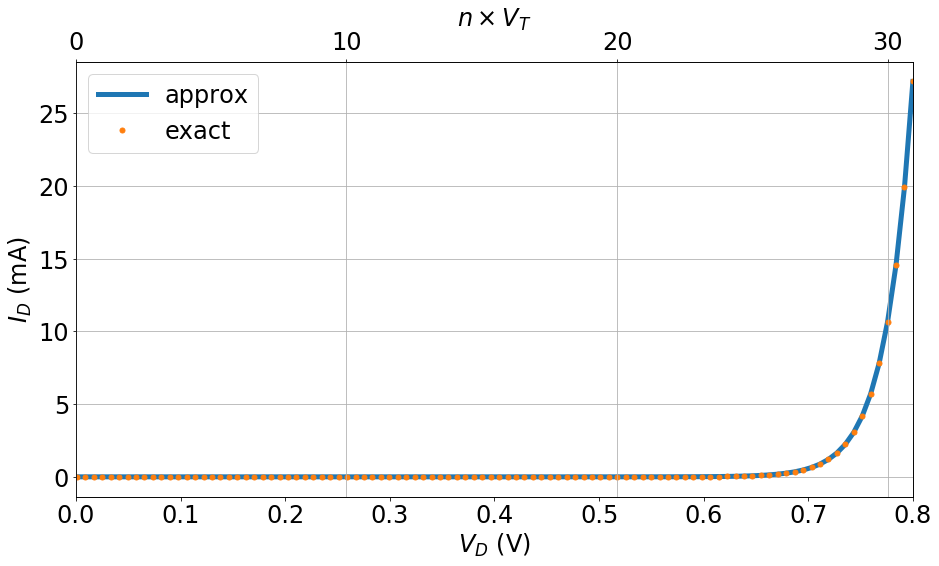

In [3]:
def plotlin_idvd(v, nvt=5):
    plt.close('all')
    ax1 = plt.subplot()
    ax1.plot(v, 1000*id_approx(v), '-', label='approx')
    ax1.plot(v, 1000*id(v), 'o', label='exact')

    r = plt.xlim([0, v.max()])
    
    plt.ylabel('$I_D$ (mA)')
    plt.xlabel('$V_D$ (V)')
    #plt.suptitle('$i_D$ vs. $v_D$', y=1.05, size='x-large')
    plt.legend(loc='upper left')
    plt.grid(axis='y')

    VT = kB * 300 / q
    ax2 = ax1.twiny()
    
    vts = np.arange(0, int(v.max() / VT) + 1, nvt)

    ax2.set_xticks(VT * vts)
    ax2.set_xticklabels(vts)
    ax2.set_xlabel(r'$n\times V_T$')
    ax2.grid(True)
    ax2.set_xlim(r)


plotlin_idvd(np.linspace(1e-3, 0.8, 100), nvt=10)
plt.show()

A linear-*y* plot isn't so helpful.

Plot with a logarithmic scale to see the vertical scale better:

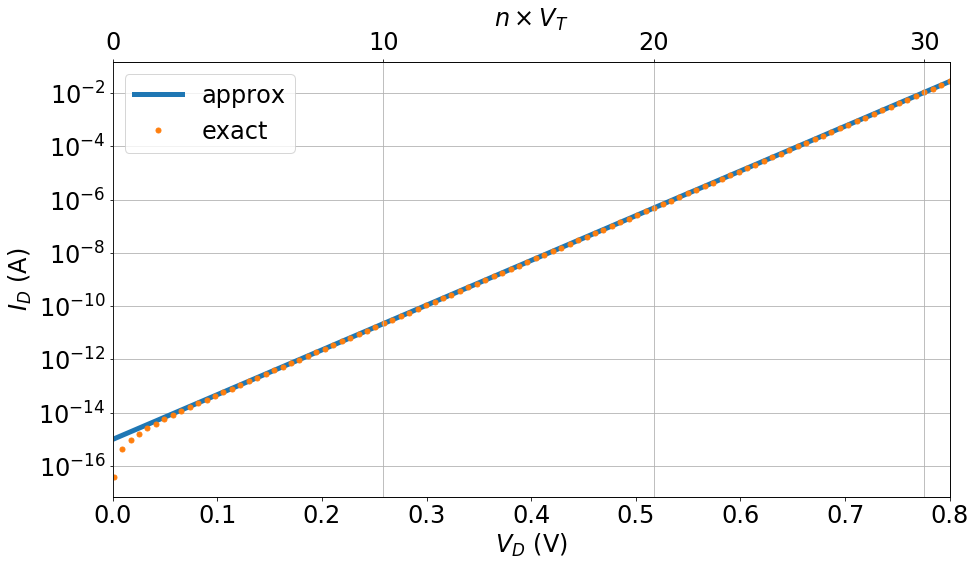

In [4]:
def plot_idvd(v, nvt=5):
    plt.close('all')
    ax1 = plt.subplot()
    plt.semilogy(v, id_approx(v), '-', label='approx')
    plt.semilogy(v, id(v), 'o', label='exact')
    plt.ylabel('$I_D$ (A)')
    plt.xlabel('$V_D$ (V)')
    #plt.suptitle('$I_D$ vs. $V_D$', y=1.05, size='x-large')
    plt.legend(loc='best')
    r = plt.xlim([0, v.max()])
    plt.grid(axis='y')
    
    VT = kB*300/q
    ax2 = ax1.twiny()
    
    vts = np.arange(0, int(v.max()/VT)+1, nvt)

    ax2.set_xticks(VT*vts)
    ax2.set_xticklabels(vts)
    ax2.set_xlabel(r'$n\times V_T$')
    ax2.grid(True)
    ax2.set_xlim(r)


plot_idvd(np.linspace(1e-3, 0.8, 100), nvt=10)
plt.show()


Zoom in to near $V_D = 0$

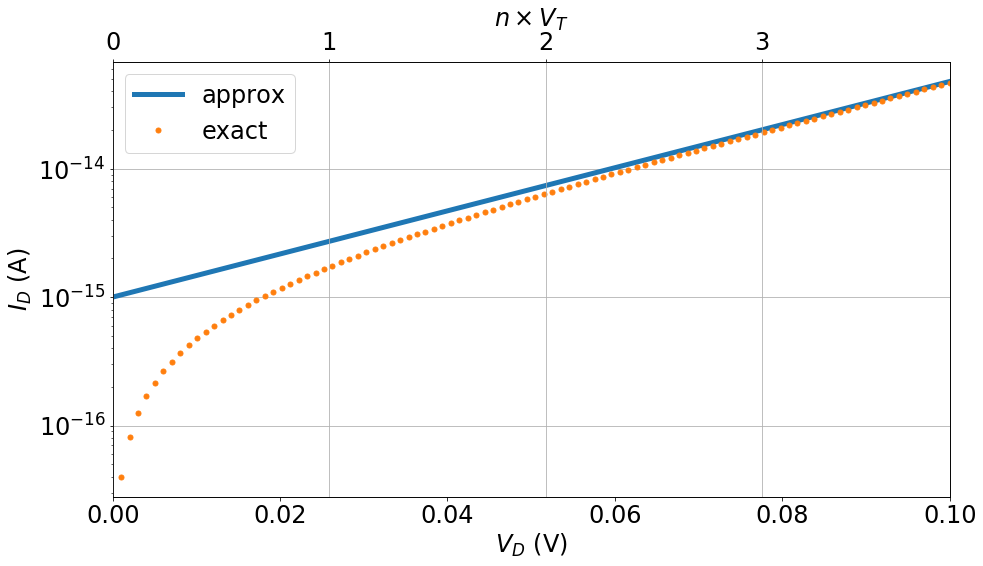

In [5]:
v = np.linspace(0, 0.1, 100)
plot_idvd(v, nvt=1)
plt.show()

$\rightarrow$ using the *approximation* is plenty good:

\begin{equation}
i_D \approx \begin{cases}
I_S \exp \left( \dfrac{v_D}{V_T} \right) & v_D > 0 \\
-I_S & v_D < 0
\end{cases}
\end{equation}

... unless $|v_D|$ is small.

**Q:** When is the approximation different from the exact equation by more than 1%?